
12. Дифференциальные уравнения. Робин Гуд
Робин Гуд бросает камень с привязанным к нему письмом через бойницу крепостной стены в открытое окно, стоящего за ней замка:

                    стена                    замок
                    _____ 
                   [     ]                  ______ 
                   [     ]                 [      ]
                   [_____]                 [      ]
                   бойница                 [      ]
                    _____                  [      ]
                   [     ]                 [      ]
                   [     ]                   окно ]
                   [     ]                 [      ]
                   [     ]                 [      ]
                   [     ]                 [      ]
                   [     ]                 [      ]
                   [     ]                 [      ]
                   [     ]                 [      ]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Смоделируйте полет камня с помощью функции integrate.solve_ivp. Рассмотрите следующие события (events):

камень упал на землю, не долетев до окна (либо до, либо после стены);
камень не попал в бойницу (ударился о стену);
камень застрял в бойнице (стукнулся о «пол» или «потолок» бойницы и упал внутри нее);
камень стукнулся о стену замка (не попав в окно);
камень попал в окно (для простоты считаем, что и крепостная стена, и замок очень высокие и сверху через них камень перебросить нельзя). При наступлении каждого из этих событий дальнейшее интегрирование прекращаются.
Написать функцию, на вход которой подаются:

параметры: масса камня, расстояние от Робин Гуда до стены, толщину стены (равную длине бойницы), расстояние от земли до бойницы и высоту бойницы, расстояние от стены до замка, расстояние от земли до окна и высоту окна,

начальные условия: угол броска и начальную скорость камня.

Программа должна отображать «вид сбоку» (многоугольники можно нарисовать с помощью функций matplotlib.patches.Patch) и траекторию полета.


\begin{equation*}
  \begin{cases}
    x^′=vx\\
    x^{′′}=\frac{-k}{m}v|v|\\
    z^′=vz\\
    z^{′′}=\frac{-k}{m}v|v|−g\\
  \end{cases}
\end{equation*}


# Попадание в стену

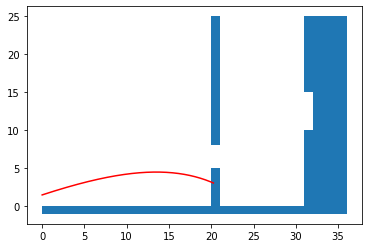

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


m = 0.2 # Масса камня
g = 9.81 # Ускорение свободного падения
lwall =20 # Расстояние от мест броска до стены с бойницей
wallWidth = 1 # Ширина стены
bHeight = 5 # Высота от земли до бойницы
boinHeight = 3 # Высота бойницы
WallCastle = 10 # Расстояние от стены до замка
wHeight = 10 # Высота от земли до окна
windowHeight = 5 # Высота окна
dis = WallCastle + wallWidth+lwall+5

k = 0.01 # Коэффициентом пропорциональност

v0 = 30 # Начальная скорость броска
angle = np.radians(20) # Угол броска


def stone(t, u):
    x, x1, z, z1 = u
    x2 = -k/m * np.sqrt(x1*x1+z1*z1) * x1
    z2 = -k/m * np.sqrt(x1*x1+z1*z1) * z1 - g
    return x1, x2, z1, z2

u0 = 0, v0 * np.cos(angle), 1.5, v0 * np.sin(angle) # Начальные условия

t0 = 0

#Событие побадания в стену с бойницей
def Wall1(t,u):
    if u[0] >= lwall and u[0] <=lwall + wallWidth and (u[2] > bHeight + boinHeight or u[2] < bHeight):
        return 0
    return 1

Wall1.terminal = True

#Событие побадания в стену замка
def Wall2(t,u):
    if u[0] >= WallCastle + wallWidth + lwall and (u[2] > wHeight + windowHeight or u[2] < wHeight):
        return 0
    return 1

Wall2.terminal = True

#Событие побадания в бойницу
def Boin(t,u):
    if u[0] >= lwall and u[0] <= lwall + wallWidth and (u[2] > bHeight + boinHeight or u[2] < bHeight):
        return 0
    return 1

Boin.terminal = True

#Событие побадания в окно
def Window(t,u):
    if u[0] >= WallCastle + wallWidth + lwall and u[2] <= wHeight + windowHeight and u[2] >= wHeight:
        return 0
    return 1

Window.terminal = True

#Событие падения на землю
def Ground(t, u):
    return u[2]

Ground.terminal = True


soln = solve_ivp(stone,[t0, 2],u0, rtol = 1e-8, atol=1e-8,dense_output=True,
events=(Ground, Wall2,Wall1, Window, Boin))


import matplotlib.patches as patches
fig = plt.figure()
ax = fig.gca()

# Отрисовка стены и замка
def build():
    
    path = [
    [0, 0],
    [dis, 0],
    [dis, -1],
    [0, -1],
    ]
    ax.add_patch(patches.Polygon(path))
    path = [
    [lwall, 0],
    [lwall, bHeight],
    [lwall+wallWidth, bHeight],
    [lwall+wallWidth, 0],
    ]
    ax.add_patch(patches.Polygon(path))
    path = [
    [lwall, bHeight+boinHeight],
    [lwall, 25],
    [lwall+wallWidth, 25],
    [lwall+wallWidth, bHeight+boinHeight],
    ]
    ax.add_patch(patches.Polygon(path))
    path = [
    [dis-5, 0],
    [dis-5, wHeight],
    [dis-5+wallWidth, wHeight],
    [dis-5+wallWidth, 0],
    ]
    ax.add_patch(patches.Polygon(path))
    path = [
    [dis-5, wHeight+windowHeight],
    [dis-5, 25],
    [dis-5+wallWidth, 25],
    [dis-5+wallWidth, wHeight+windowHeight],
    ]
    ax.add_patch(patches.Polygon(path))
    path = [
    [dis-5+wallWidth, 0],
    [dis-5+wallWidth, 25],
    [dis, 25],
    [dis, 0],
    ]
    ax.add_patch(patches.Polygon(path))
build()
m = -1
for i in range(5):
    if len(soln.t_events[i]) != 0 and (soln.t_events[i][0] < m or m == -1):
        m = soln.t_events[i][0]
        
t = np.linspace(t0, m, 500)
ax.plot(soln.sol(t)[0],soln.sol(t)[2], color="red")

# Попадание в окно

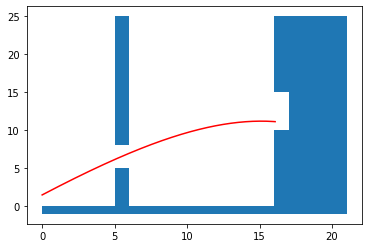

In [15]:
m = 0.2 # Масса камня
g = 9.81 # Ускорение свободного падения
lwall =5 # Расстояние от мест броска до стены с бойницей
wallWidth = 1 # Ширина стены
bHeight = 5 # Высота от земли до бойницы
boinHeight = 3 # Высота бойницы
WallCastle = 10 # Расстояние от стены до замка
wHeight = 10 # Высота от земли до окна
windowHeight = 5 # Высота окна
dis = WallCastle + wallWidth+lwall+5

k = 0.01 # Коэффициентом пропорциональност

v0 = 30 # Начальная скорость броска
angle = np.radians(45) # Угол броска


def stone(t, u):
    x, x1, z, z1 = u
    x2 = -k/m * np.sqrt(x1*x1+z1*z1) * x1
    z2 = -k/m * np.sqrt(x1*x1+z1*z1) * z1 - g
    return x1, x2, z1, z2

u0 = 0, v0 * np.cos(angle), 1.5, v0 * np.sin(angle) # Начальные условия

t0 = 0

#Событие побадания в стену с бойницей
def Wall1(t,u):
    if u[0] >= lwall and u[0] <=lwall + wallWidth and (u[2] > bHeight + boinHeight or u[2] < bHeight):
        return 0
    return 1

Wall1.terminal = True

#Событие побадания в стену замка
def Wall2(t,u):
    if u[0] >= WallCastle + wallWidth + lwall and (u[2] > wHeight + windowHeight or u[2] < wHeight):
        return 0
    return 1

Wall2.terminal = True

#Событие побадания в бойницу
def Boin(t,u):
    if u[0] >= lwall and u[0] <= lwall + wallWidth and (u[2] > bHeight + boinHeight or u[2] < bHeight):
        return 0
    return 1

Boin.terminal = True

#Событие побадания в окно
def Window(t,u):
    if u[0] >= WallCastle + wallWidth + lwall and u[2] <= wHeight + windowHeight and u[2] >= wHeight:
        return 0
    return 1

Window.terminal = True

#Событие падения на землю
def Ground(t, u):
    return u[2]

Ground.terminal = True


soln = solve_ivp(stone,[t0, 2],u0, rtol = 1e-8, atol=1e-8,dense_output=True,
events=(Ground, Wall2,Wall1, Window, Boin))
fig = plt.figure()
ax = fig.gca()
build()
m = -1
for i in range(4):
    if len(soln.t_events[i]) != 0 and (soln.t_events[i][0] < m or m == -1):
        m = soln.t_events[i][0]
        
t = np.linspace(t0, m, 500)
ax.plot(soln.sol(t)[0],soln.sol(t)[2], color="red")

# Попадание в стену замка 

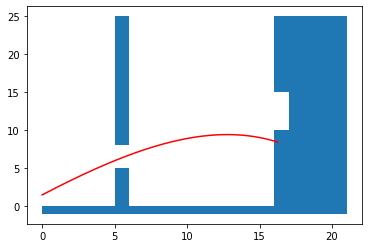

In [16]:
m = 0.2 # Масса камня
g = 9.81 # Ускорение свободного падения
lwall =5 # Расстояние от мест броска до стены с бойницей
wallWidth = 1 # Ширина стены
bHeight = 5 # Высота от земли до бойницы
boinHeight = 3 # Высота бойницы
WallCastle = 10 # Расстояние от стены до замка
wHeight = 10 # Высота от земли до окна
windowHeight = 5 # Высота окна
dis = WallCastle + wallWidth+lwall+5

k = 0.01 # Коэффициентом пропорциональност

v0 = 25 # Начальная скорость броска
angle = np.radians(45) # Угол броска


def stone(t, u):
    x, x1, z, z1 = u
    x2 = -k/m * np.sqrt(x1*x1+z1*z1) * x1
    z2 = -k/m * np.sqrt(x1*x1+z1*z1) * z1 - g
    return x1, x2, z1, z2

u0 = 0, v0 * np.cos(angle), 1.5, v0 * np.sin(angle) # Начальные условия

t0 = 0

#Событие побадания в стену с бойницей
def Wall1(t,u):
    if u[0] >= lwall and u[0] <=lwall + wallWidth and (u[2] > bHeight + boinHeight or u[2] < bHeight):
        return 0
    return 1

Wall1.terminal = True

#Событие побадания в стену замка
def Wall2(t,u):
    if u[0] >= WallCastle + wallWidth + lwall and (u[2] > wHeight + windowHeight or u[2] < wHeight):
        return 0
    return 1

Wall2.terminal = True

#Событие побадания в бойницу
def Boin(t,u):
    if u[0] >= lwall and u[0] <= lwall + wallWidth and (u[2] > bHeight + boinHeight or u[2] < bHeight):
        return 0
    return 1

Boin.terminal = True

#Событие побадания в окно
def Window(t,u):
    if u[0] >= WallCastle + wallWidth + lwall and u[2] <= wHeight + windowHeight and u[2] >= wHeight:
        return 0
    return 1

Window.terminal = True

#Событие падения на землю
def Ground(t, u):
    return u[2]

Ground.terminal = True


soln = solve_ivp(stone,[t0, 2],u0, rtol = 1e-8, atol=1e-8,dense_output=True,
events=(Ground, Wall2,Wall1, Window, Boin))
fig = plt.figure()
ax = fig.gca()
build()
m = -1
for i in range(4):
    if len(soln.t_events[i]) != 0 and (soln.t_events[i][0] < m or m == -1):
        m = soln.t_events[i][0]
        
t = np.linspace(t0, m, 500)
ax.plot(soln.sol(t)[0],soln.sol(t)[2], color="red")

# Попадание в бойницу

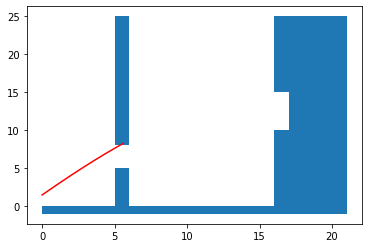

In [19]:
m = 0.2 # Масса камня
g = 9.81 # Ускорение свободного падения
lwall =5 # Расстояние от мест броска до стены с бойницей
wallWidth = 1 # Ширина стены
bHeight = 5 # Высота от земли до бойницы
boinHeight = 3 # Высота бойницы
WallCastle = 10 # Расстояние от стены до замка
wHeight = 10 # Высота от земли до окна
windowHeight = 5 # Высота окна
dis = WallCastle + wallWidth+lwall+5

k = 0.01 # Коэффициентом пропорциональност

v0 = 30 # Начальная скорость броска
angle = np.radians(53) # Угол броска


def stone(t, u):
    x, x1, z, z1 = u
    x2 = -k/m * np.sqrt(x1*x1+z1*z1) * x1
    z2 = -k/m * np.sqrt(x1*x1+z1*z1) * z1 - g
    return x1, x2, z1, z2

u0 = 0, v0 * np.cos(angle), 1.5, v0 * np.sin(angle) # Начальные условия

t0 = 0

#Событие побадания в стену с бойницей
def Wall1(t,u):
    if u[0] >= lwall and u[0] <=lwall + wallWidth and (u[2] > bHeight + boinHeight or u[2] < bHeight):
        return 0
    return 1

Wall1.terminal = True

#Событие побадания в стену замка
def Wall2(t,u):
    if u[0] >= WallCastle + wallWidth + lwall and (u[2] > wHeight + windowHeight or u[2] < wHeight):
        return 0
    return 1

Wall2.terminal = True

#Событие побадания в бойницу
def Boin(t,u):
    if u[0] >= lwall and u[0] <= lwall + wallWidth and (u[2] > bHeight + boinHeight or u[2] < bHeight):
        return 0
    return 1

Boin.terminal = True

#Событие побадания в окно
def Window(t,u):
    if u[0] >= WallCastle + wallWidth + lwall and u[2] <= wHeight + windowHeight and u[2] >= wHeight:
        return 0
    return 1

Window.terminal = True

#Событие падения на землю
def Ground(t, u):
    return u[2]

Ground.terminal = True


soln = solve_ivp(stone,[t0, 2],u0, rtol = 1e-8, atol=1e-8,dense_output=True,
events=(Ground, Wall2,Wall1, Window, Boin))
fig = plt.figure()
ax = fig.gca()
build()
m = -1
for i in range(4):
    if len(soln.t_events[i]) != 0 and (soln.t_events[i][0] < m or m == -1):
        m = soln.t_events[i][0]
        
t = np.linspace(t0, m, 500)
ax.plot(soln.sol(t)[0],soln.sol(t)[2], color="red")

# Камень падает на землю

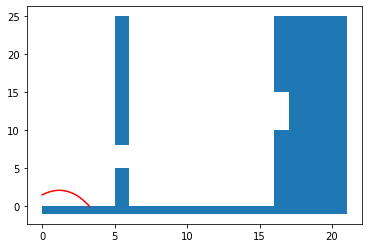

In [20]:
m = 0.2 # Масса камня
g = 9.81 # Ускорение свободного падения
lwall =5 # Расстояние от мест броска до стены с бойницей
wallWidth = 1 # Ширина стены
bHeight = 5 # Высота от земли до бойницы
boinHeight = 3 # Высота бойницы
WallCastle = 10 # Расстояние от стены до замка
wHeight = 10 # Высота от земли до окна
windowHeight = 5 # Высота окна
dis = WallCastle + wallWidth+lwall+5

k = 0.01 # Коэффициентом пропорциональност

v0 = 5 # Начальная скорость броска
angle = np.radians(45) # Угол броска


def stone(t, u):
    x, x1, z, z1 = u
    x2 = -k/m * np.sqrt(x1*x1+z1*z1) * x1
    z2 = -k/m * np.sqrt(x1*x1+z1*z1) * z1 - g
    return x1, x2, z1, z2

u0 = 0, v0 * np.cos(angle), 1.5, v0 * np.sin(angle) # Начальные условия

t0 = 0

#Событие побадания в стену с бойницей
def Wall1(t,u):
    if u[0] >= lwall and u[0] <=lwall + wallWidth and (u[2] > bHeight + boinHeight or u[2] < bHeight):
        return 0
    return 1

Wall1.terminal = True

#Событие побадания в стену замка
def Wall2(t,u):
    if u[0] >= WallCastle + wallWidth + lwall and (u[2] > wHeight + windowHeight or u[2] < wHeight):
        return 0
    return 1

Wall2.terminal = True

#Событие побадания в бойницу
def Boin(t,u):
    if u[0] >= lwall and u[0] <= lwall + wallWidth and (u[2] > bHeight + boinHeight or u[2] < bHeight):
        return 0
    return 1

Boin.terminal = True

#Событие побадания в окно
def Window(t,u):
    if u[0] >= WallCastle + wallWidth + lwall and u[2] <= wHeight + windowHeight and u[2] >= wHeight:
        return 0
    return 1

Window.terminal = True

#Событие падения на землю
def Ground(t, u):
    return u[2]

Ground.terminal = True


soln = solve_ivp(stone,[t0, 2],u0, rtol = 1e-8, atol=1e-8,dense_output=True,
events=(Ground, Wall2,Wall1, Window, Boin))
fig = plt.figure()
ax = fig.gca()
build()
m = -1
for i in range(4):
    if len(soln.t_events[i]) != 0 and (soln.t_events[i][0] < m or m == -1):
        m = soln.t_events[i][0]
        
t = np.linspace(t0, m, 500)
ax.plot(soln.sol(t)[0],soln.sol(t)[2], color="red")

# Вывод

Таким образом, меняя угол броска и скорость бросания камня можно получить разные результаты траектории полета.